# Mengakses API covid19.go.id

In [44]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)

/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [45]:
resp

<Response [200]>

# untuk mengetahui metadata yang disimpan

In [46]:
resp.headers

{'X-GUploader-UploadID': 'ADPycdumL-Eoy5fiZu4REDeCtZFNDCcjfV-3PqGnVQ3Mhb-YWiWfmRtxKfoB_mqbqPgaQ2viTKxF92j7W_Q-UevwINCQTg', 'x-goog-generation': '1654513959565478', 'x-goog-metageneration': '1', 'x-goog-stored-content-encoding': 'identity', 'x-goog-stored-content-length': '311897', 'x-goog-hash': 'crc32c=GMMqEA==, md5=8aR/820+lfYyWNlv5bLUOQ==', 'x-goog-storage-class': 'STANDARD', 'Accept-Ranges': 'bytes', 'Content-Length': '311897', 'Server': 'UploadServer', 'Date': 'Thu, 16 Mar 2023 07:39:41 GMT', 'Expires': 'Thu, 16 Mar 2023 08:39:41 GMT', 'Cache-Control': 'public, max-age=3600', 'Age': '54', 'Last-Modified': 'Mon, 06 Jun 2022 11:12:39 GMT', 'ETag': '"f1a47ff36d3e95f63258d96fe5b2d439"', 'Content-Type': 'application/json'}

# ekstrak konten
* Json
* attribut content tetapi ini berupa binary content yang perlu Anda proses kembali nantinya

In [47]:
cov_id_raw = resp.json()

# mengecek isi data

In [48]:
print('length of cov_id_raw: %d' %len(cov_id_raw))
print('komponent of cov_id_raw: %s' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

length of cov_id_raw: 2
komponent of cov_id_raw: dict_keys(['data', 'update'])


In [49]:
cov_id_update

{'penambahan': {'jumlah_positif': 308,
  'jumlah_meninggal': 5,
  'jumlah_sembuh': 416,
  'jumlah_dirawat': -113,
  'tanggal': '2022-05-14',
  'created': '2022-05-14 17:27:17'},
 'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z',
   'key': 1583107200000,
   'doc_count': 1,
   'jumlah_meninggal': {'value': 0},
   'jumlah_sembuh': {'value': 0},
   'jumlah_positif': {'value': 2},
   'jumlah_dirawat': {'value': 2},
   'jumlah_positif_kum': {'value': 2},
   'jumlah_sembuh_kum': {'value': 0},
   'jumlah_meninggal_kum': {'value': 0},
   'jumlah_dirawat_kum': {'value': 2}},
  {'key_as_string': '2020-03-03T00:00:00.000Z',
   'key': 1583193600000,
   'doc_count': 1,
   'jumlah_meninggal': {'value': 0},
   'jumlah_sembuh': {'value': 0},
   'jumlah_positif': {'value': 0},
   'jumlah_dirawat': {'value': 0},
   'jumlah_positif_kum': {'value': 2},
   'jumlah_sembuh_kum': {'value': 0},
   'jumlah_meninggal_kum': {'value': 0},
   'jumlah_dirawat_kum': {'value': 2}},
  {'key_as_string': '2020-03-0

In [50]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2022-05-14
Jumlah penambahan kasus sembuh : 416
Jumlah penambahan kasus meninggal : 5
Jumlah total kasus positif hingga saat ini : 6050519
Jumlah total kasus meninggal hingga saat ini: 156453


covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. 
Sebagai data mengenai COVID-19 Jawa Barat, tempat tinggal saya sekarang, tersedia di https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json

In [51]:
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [52]:
print(cov_jabar_raw.keys())
print('Berapa jumlah total kasus COVID-19 di Jawa Barat?', cov_jabar_raw['kasus_total'])
print('Berapa persentase kematian akibat COVID-19 di Jawa Barat?', cov_jabar_raw['meninggal_persen'])
print('Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?', cov_jabar_raw['sembuh_persen'])

dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])
Berapa jumlah total kasus COVID-19 di Jawa Barat? 1105134
Berapa persentase kematian akibat COVID-19 di Jawa Barat? 1.425618974712569
Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat? 98.28238023624284


# Memperoleh Informasi yang Lebih Lengkap (realtime)

In [53]:
import pandas as pd

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('info dataframe:', cov_jabar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       785 non-null    int64
 1   KASUS                         785 non-null    int64
 2   MENINGGAL                     785 non-null    int64
 3   SEMBUH                        785 non-null    int64
 4   DIRAWAT_OR_ISOLASI            785 non-null    int64
 5   AKUMULASI_KASUS               785 non-null    int64
 6   AKUMULASI_SEMBUH              785 non-null    int64
 7   AKUMULASI_MENINGGAL           785 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  785 non-null    int64
dtypes: int64(9)
memory usage: 55.3 KB
info dataframe: None


# processing data

Ada beberapa tahapan yang akan Anda lakukan untuk menjinakan data cov_jabar, yaitu:

* Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
* Merubah format penulisan semua kolom menjadi huruf kecil
* Mengganti nama kolom kasus menjadi kasus_baru
* Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime


In [54]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
                                 if item.startswith('AKUMULASI') or item.startswith('DIRAWAT')])
                                 .rename(columns=str.lower)
                                 .rename(columns={'kasus':'kasus_baru'})
                                 )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
cov_jabar_tidy.head()

,tanggal,kasus_baru,meninggal,sembuh
0,2020-03-03,1,1,0
1,2020-03-04,1,0,0
2,2020-03-05,1,0,0
3,2020-03-06,1,0,0
4,2020-03-07,0,0,0


# visulisasi data

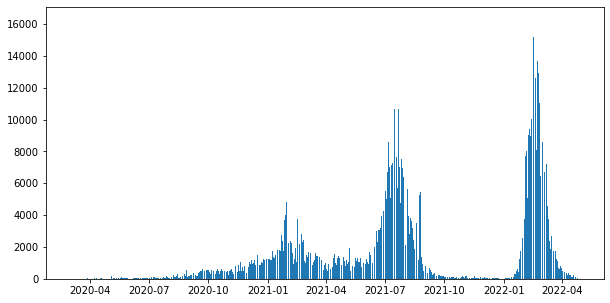

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

<ipython-input-56-57b0f3562c0f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

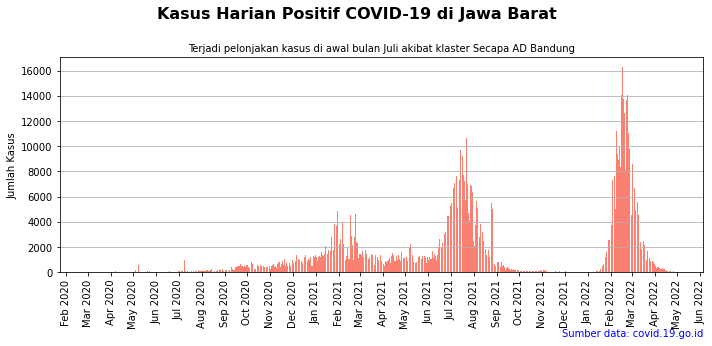

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-57-bf1b6793ab5a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

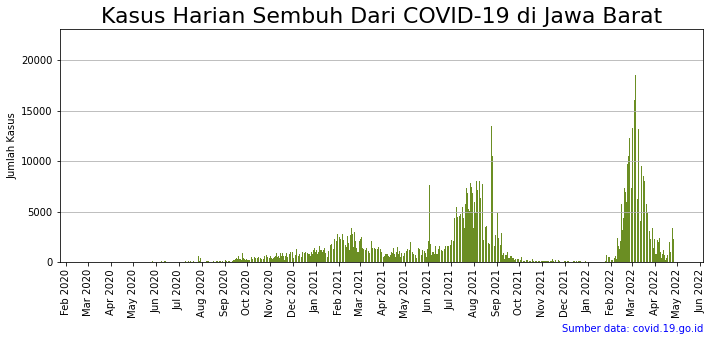

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-58-7f21febca761>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

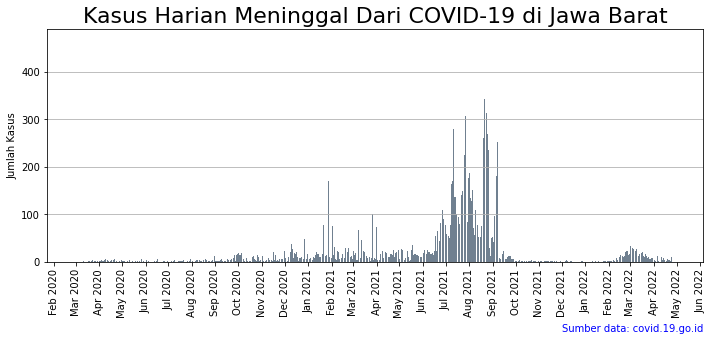

In [58]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [59]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('w')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] =cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     113 non-null    int64
 1   pekan_ke  113 non-null    int64
 2   jumlah    113 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


In [60]:
import numpy as np


cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


<ipython-input-60-15f9ba06dea8>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)


<Figure size 432x288 with 0 Axes>

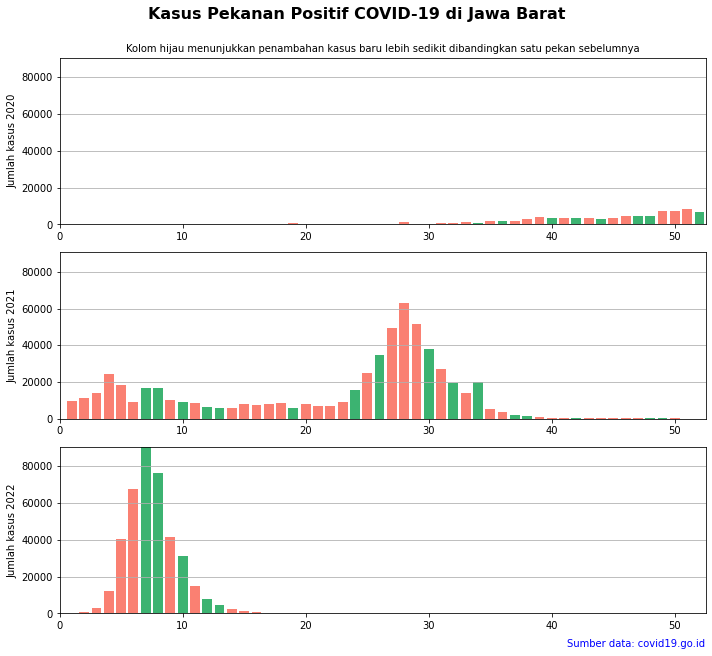

In [61]:
import matplotlib.pyplot as plt
plt.clf()

jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, figsize=(10, 3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
			y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
	ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]],
		  x='pekan_ke', height='jumlah',
		  color=['mediumseagreen' if x is True else 'salmon'
				for x in cov_jabar_pekanan['lebih_baik']])
	if i == 0:
		ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
					fontsize=10)
	elif i == jml_tahun_terjadi_covid19-1:
		ax.text(1, -0.2, 'Sumber data: covid19.go.id', color='blue',
			   ha='right', transform=ax.transAxes)
	ax.set_xlim([0, 52.5])
	ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
	ax.set_xlabel('')
	ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
	ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [62]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
780 2022-04-22            10753           1078344                15735
781 2022-04-23             9882           1079297                15737
782 2022-04-24             8709           1080519                15748
783 2022-04-25             5428           1083851                15751
784 2022-04-26             3253           1086129                15752


/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<ipython-input-63-606383d15764>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

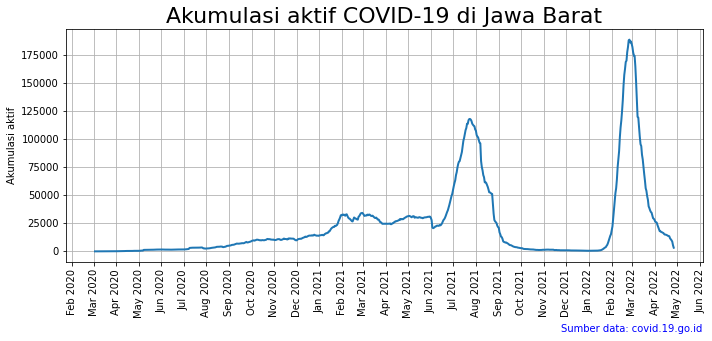

In [63]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

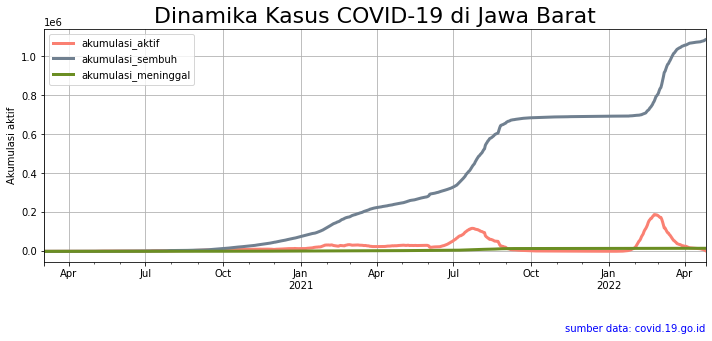

In [64]:
#Tuliskan kodenya berikut ini
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()

fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
       color=['salmon', 'slategrey', 'olivedrab'])
ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
fontsize=22)

ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()